In [293]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy
import sklearn

In [294]:
df = pd.read_csv("amazon_cells_labelled.txt", error_bad_lines=False, header=None, sep="\t")

In [295]:
df.tail(45)

,0,1
955,Buttons are too small.,0
956,Just reading on the specs alone makes you say ...,1
957,Love it.. Great armband.,1
958,I really like this product over the Motorola b...,1
959,"However, the keypads are so tinny that I somet...",0
960,I exchanged the sony ericson z500a for this an...,1
961,I was very impressed with the price of the cases.,1
962,Also makes it easier to hold on to.,1
963,I use this product in a motor control center w...,1
964,It's pretty easy.,1


In [296]:
df.columns = ["message", "negative review"]

In [297]:
df.head()

,message,negative review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [298]:
df["negative review"] = (df["negative review"] == 0)

In [299]:
df.head()

,message,negative review
0,So there is no way for me to plug it in here i...,True
1,"Good case, Excellent value.",False
2,Great for the jawbone.,False
3,Tied to charger for conversations lasting more...,True
4,The mic is great.,False


In [300]:
bad_words = ["waste", "awful", "cheap", "problem", "mislead", "lousy", "disappointed", "junk", "unsatisfactory", "not"]
good_words = ["excellent", "great", "best", "amazing", "impressed", "good", "nice", "happy", "beautiful", "love"]

for word in bad_words:
    df[str(word)] = df["message"].str.contains(str(word), case=False)

  

In [301]:
for word in good_words:
    df[str(word)] = df["message"].str.contains(str(word), case=False)

In [302]:
df.columns

Index(['message', 'negative review', 'waste', 'awful', 'cheap', 'problem',
       'mislead', 'lousy', 'disappointed', 'junk', 'unsatisfactory', 'not',
       'excellent', 'great', 'best', 'amazing', 'impressed', 'good', 'nice',
       'happy', 'beautiful', 'love'],
      dtype='object')

In [303]:
df.tail(30)

,message,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,...,excellent,great,best,amazing,impressed,good,nice,happy,beautiful,love
970,I plugged it in only to find out not a darn th...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
971,Excellent product.,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
972,Earbud piece breaks easily.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
973,Lousy product.,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
974,This phone tries very hard to do everything bu...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
975,It is the best charger I have seen on the mark...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
976,SWEETEST PHONE!!!,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
977,":-)Oh, the charger seems to work fine.",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
978,It fits so securely that the ear hook does not...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
979,Not enough volume.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [304]:
df.head(10)

,message,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,...,excellent,great,best,amazing,impressed,good,nice,happy,beautiful,love
0,So there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,Great for the jawbone.,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


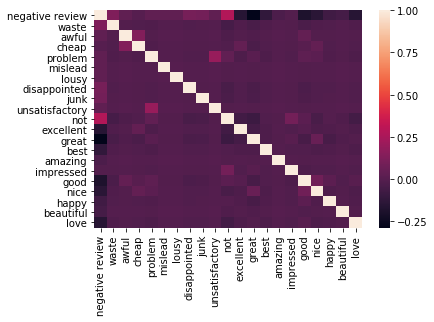

In [305]:
sns.heatmap(df.corr())

In [306]:
df.corr()

,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,unsatisfactory,...,excellent,great,best,amazing,impressed,good,nice,happy,beautiful,love
negative review,1.000000e+00,0.127515,0.031686,1.306397e-18,0.032026,0.031639,0.031639,0.100504,0.089803,0.031639,...,-0.154242,-0.289256,-0.122713,-0.031639,-0.010589,-0.186035,-0.143745,-0.069621,-0.054855,-0.156813
waste,1.275153e-01,1.000000,-0.008081,-1.405318e-02,-0.020419,-0.004034,-0.004034,-0.012816,-0.011451,-0.004034,...,-0.021242,-0.042031,-0.019125,-0.004034,-0.012152,-0.036310,-0.019996,-0.016769,-0.006995,-0.019996
awful,3.168621e-02,-0.008081,1.000000,1.385186e-01,-0.010148,-0.002005,-0.002005,-0.006369,-0.005691,-0.002005,...,-0.010557,-0.020889,-0.009505,-0.002005,-0.006039,0.042105,-0.009938,-0.008334,-0.003476,-0.009938
cheap,1.306397e-18,-0.014053,0.138519,1.000000e+00,-0.017647,-0.003487,-0.003487,-0.011076,-0.009897,-0.003487,...,0.038304,-0.036326,-0.016529,-0.003487,-0.010503,0.003487,0.042725,-0.014493,-0.006045,-0.017282
problem,3.202563e-02,-0.020419,-0.010148,-1.764736e-02,1.000000,-0.005066,-0.005066,-0.016093,-0.014380,0.197583,...,-0.026674,0.011849,-0.024016,-0.005066,-0.015260,0.027358,0.016740,-0.021058,-0.008784,-0.025110
mislead,3.163860e-02,-0.004034,-0.002005,-3.486819e-03,-0.005066,1.000000,-0.001001,-0.003180,-0.002841,-0.001001,...,-0.005270,-0.010429,-0.004745,-0.001001,-0.003015,-0.009009,-0.004961,-0.004161,-0.001736,-0.004961
lousy,3.163860e-02,-0.004034,-0.002005,-3.486819e-03,-0.005066,-0.001001,1.000000,-0.003180,-0.002841,-0.001001,...,-0.005270,-0.010429,-0.004745,-0.001001,-0.003015,-0.009009,-0.004961,-0.004161,-0.001736,-0.004961
disappointed,1.005038e-01,-0.012816,-0.006369,-1.107630e-02,-0.016093,-0.003180,-0.003180,1.000000,-0.009026,-0.003180,...,-0.016742,-0.033128,-0.015074,-0.003180,-0.009578,-0.028618,-0.015760,-0.013217,-0.005513,-0.015760
junk,8.980265e-02,-0.011451,-0.005691,-9.896948e-03,-0.014380,-0.002841,-0.002841,-0.009026,1.000000,-0.002841,...,-0.014959,-0.029600,-0.013469,-0.002841,-0.008558,-0.025571,-0.014082,-0.011810,-0.004926,-0.014082
unsatisfactory,3.163860e-02,-0.004034,-0.002005,-3.486819e-03,0.197583,-0.001001,-0.001001,-0.003180,-0.002841,1.000000,...,-0.005270,-0.010429,-0.004745,-0.001001,-0.003015,-0.009009,-0.004961,-0.004161,-0.001736,-0.004961


In [307]:
data = df.iloc[:, 2:]
target = df["negative review"]

In [308]:
target.head()

0     True
1    False
2    False
3     True
4    False
Name: negative review, dtype: bool

In [309]:
data.shape

(1000, 20)

In [310]:
type(target)

pandas.core.series.Series

In [311]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
model = bnb.fit(data, target)
y_pred = model.predict(data)
print("Number of mislabeled points out of a total of {} points: {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total of 1000 points: 278


In [312]:
df[(df["negative review"] != y_pred)& (df["negative review"] == False)]

,message,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,...,excellent,great,best,amazing,impressed,good,nice,happy,beautiful,love
7,If you are Razr owner...you must have this!,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,He was very impressed when going from the orig...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
15,Highly recommend for any one who has a blue to...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,I have yet to run this new battery below two b...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,This product is ideal for people like me whose...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,Car charger as well as AC charger are included...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
36,It has kept up very well.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45,It has all the features I want,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48,This case seems well made.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51,good protection and does not make phone too bu...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [313]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[238, 262],
       [ 16, 484]], dtype=int64)

# Evaluate Your Classifier

In [314]:
df["negative review"].value_counts()

#checking for class imbalance; it's a perfectly distributed dataset

True     500
False    500
Name: negative review, dtype: int64

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [326]:
#classifier 1 (all features)
data = df.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.69
Testing on Sample: 0.722


array([0.8 , 0.75, 0.8 , 0.71, 0.71, 0.71, 0.62, 0.67, 0.76, 0.66])

In [327]:
#classifier 2 (only negative words)
data = df.iloc[:, 2:12]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.65
Testing on Sample: 0.633


array([0.65, 0.65, 0.65, 0.61, 0.69, 0.53, 0.59, 0.6 , 0.62, 0.65])

In [328]:
#classifier 3 (only positive words)
data = df.iloc[:, 12:]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.695
Testing on Sample: 0.715


array([0.79, 0.74, 0.8 , 0.7 , 0.7 , 0.7 , 0.65, 0.66, 0.74, 0.66])

In [329]:
#classifier 4 (negative words except not)
data = df.iloc[:, 2:11]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.565
Testing on Sample: 0.543


array([0.56, 0.54, 0.57, 0.54, 0.56, 0.48, 0.5 , 0.52, 0.51, 0.57])

In [330]:
#classifier 5 (positive words without love)
data = df.iloc[:, 12:21]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.675
Testing on Sample: 0.694


array([0.74, 0.73, 0.75, 0.68, 0.69, 0.69, 0.63, 0.65, 0.72, 0.65])

In [331]:
#classifier 6 (all features except love)
data = df.iloc[:, 2:21]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.675
Testing on Sample: 0.705


array([0.75, 0.74, 0.75, 0.68, 0.7 , 0.7 , 0.6 , 0.65, 0.73, 0.65])

+ **Do any of your classifiers seem to overfit?** Looking at the holdout groups versus the testing samples, in most cases there is a difference of around .02. This seems like a negligible degree of discrepancy. However, when using folds in my cross validation, the possibility of overfitting became more apparent. For example, when looking at all features, the lowest percent accuracy is .8 and the lowest is .62. Overall, the best accuracy is showing up in the first fold, and this is probably because I based my features on the "head" of the dataset.
+ **Which seem to perform the best? Why?** The classifier with the best accuracy is classifier 3 (only positive words). The classifier that shows the least evidence of overfitting is classifier 4 (negative words except not). The classifier with the optimal combination of accuracy and lack of overfitting is classifier 3 (only positive words).
+ **Which features seemed to be most impactful to performance?** In general, positive words as a whole had a stronger impact on the prediction accuracy than did negative words as a whole. The single feature that seemed to have the strongest correlation with the prediction of the negative review was the presence of the word "not." When I ran the model with all negative words except "not," the percent accuracy dropped by 8%.